## **NetworkX - Generate Network Graphs**

> Indented block



by Hong Qu at NetSci 2022 Network Science and Education Symposium
(https://sites.google.com/view/netscied2022/)

**Graph models:**
1.   Star
2.   Path
1.   Small World
2.   Small World Rewired
1.   Random
2.   Scale Free

In [900]:
import networkx as nx
from matplotlib import pyplot as plt

## How many nodes do you want in these graph?
Drag the slider to choose a number between 10 - 100:

In [901]:
n = 99 #@param {type:"slider", min:10, max:100, step:1}

In [902]:
#Don't need to edit these values 
#Unless you want to experiment with small world graph rewiring probability (p_small_world_rewire between 0-1)
#or change the random graph edge density using the probably of edge formation (p_random_link between 0-1)
p_small_world_rewire = .2
p_random_link = .2

**Generating 6 types of network models:**

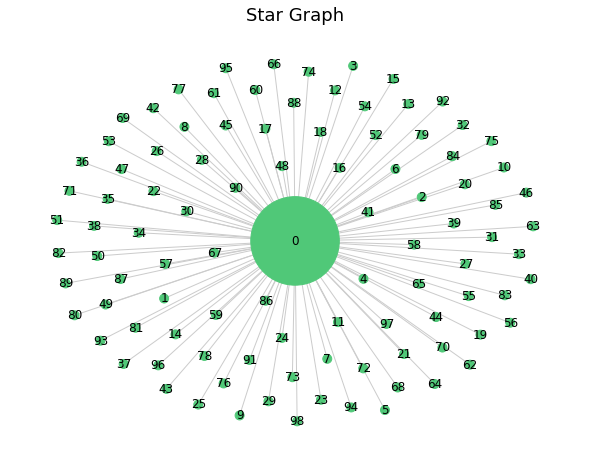

In [903]:
G_star = nx.star_graph(n-1)
plt.figure(figsize=(8, 6))
degree_dist = dict(G_star.degree)
nx.draw(G_star, edge_color='#CCCCCC', node_size=[v * 80 for v in degree_dist.values()], node_color='#50C878', with_labels = True)
plt.title('Star Graph', size=18)
plt.show()

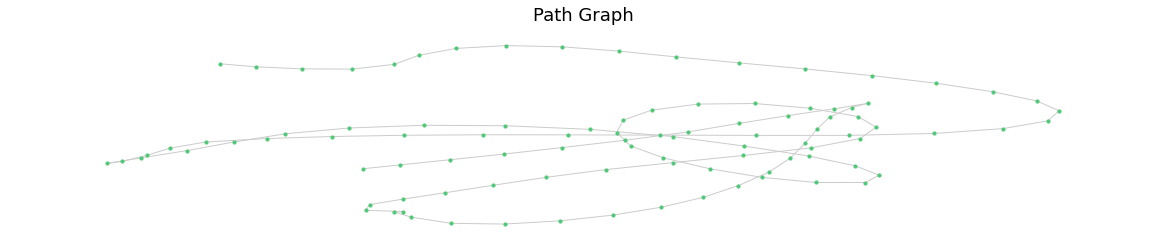

In [904]:
G_path = nx.path_graph(n, create_using=None)
plt.figure(figsize=(16, 3))
nx.draw(G_path, edge_color='#CCCCCC', node_size=10, node_color='#50C878', with_labels = False)
plt.title('Path Graph', size=18)
plt.show()

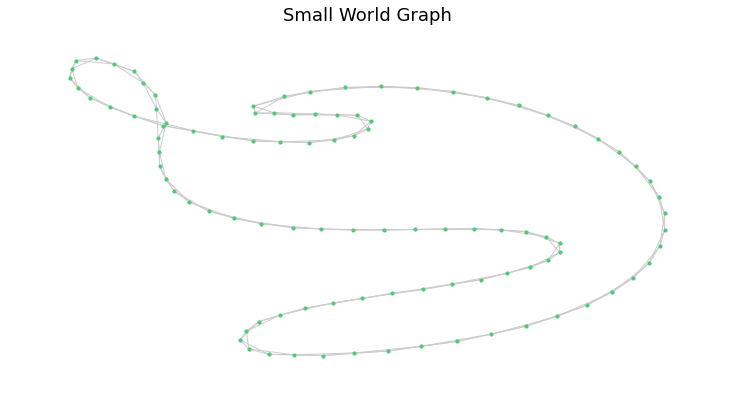

In [905]:
G_small_world = nx.watts_strogatz_graph(n, 4, 0, seed=None)
plt.figure(figsize=(10, 5))
nx.draw(G_small_world, edge_color='#CCCCCC', node_size=10, node_color='#50C878', with_labels = False)
plt.title('Small World Graph', size=18)
plt.show()

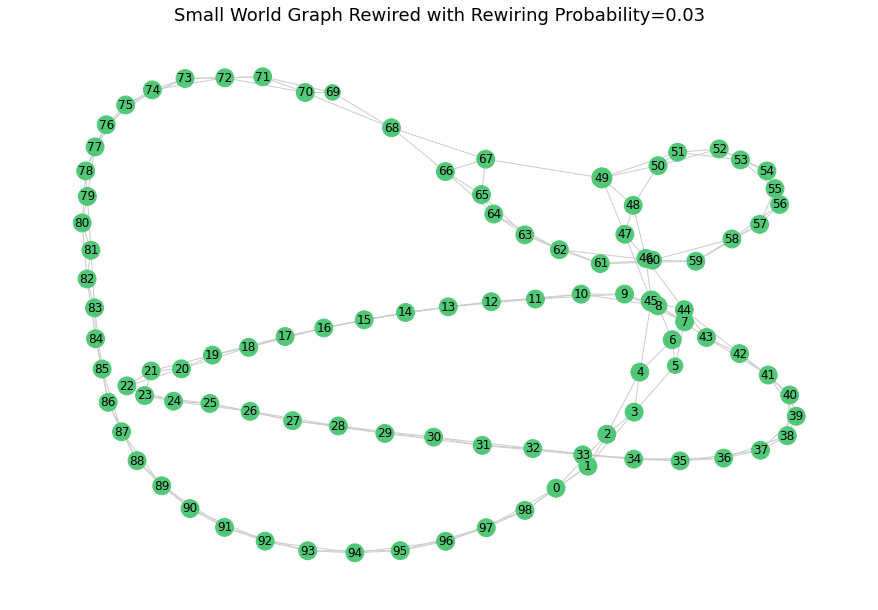

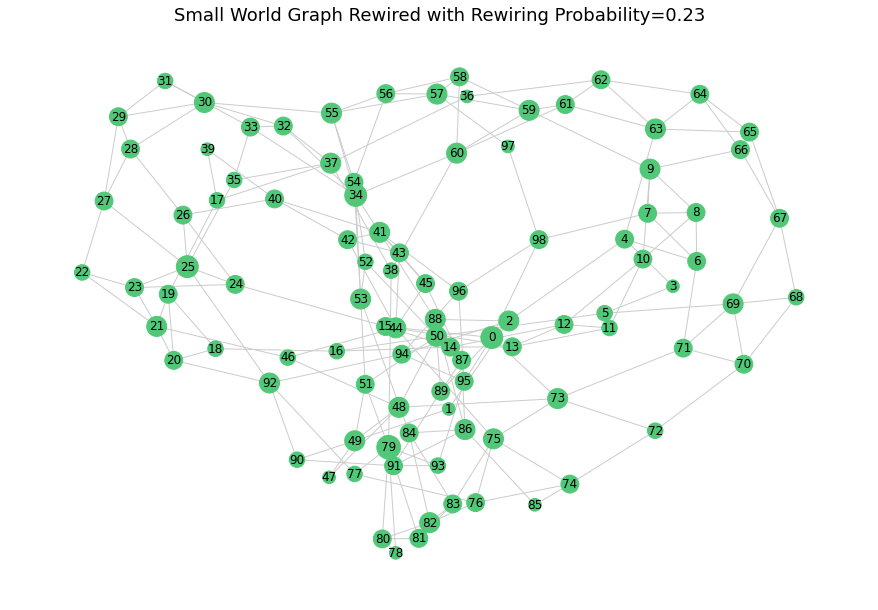

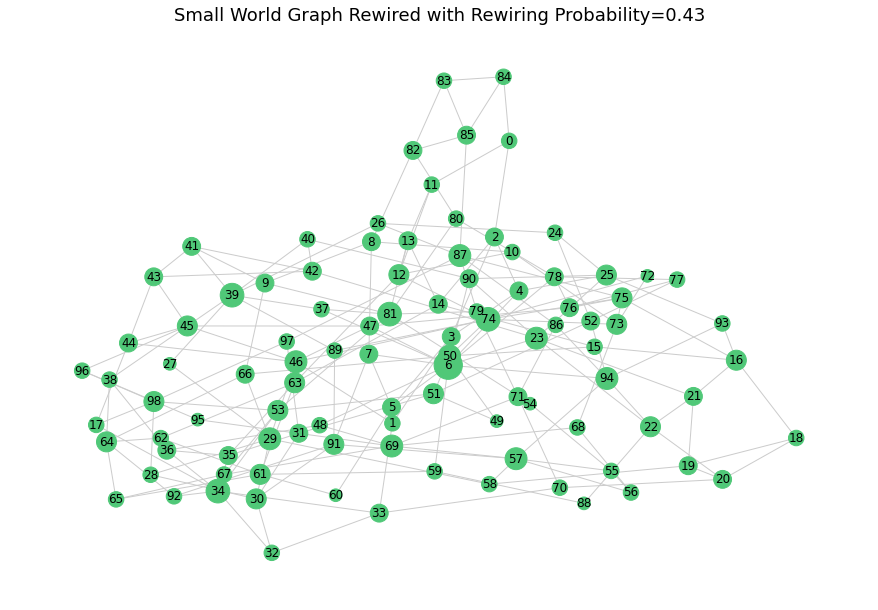

In [906]:
for i in range(0,60, 20):
  p_rewire=i/100 +.03
  G_small_world_rewired = nx.watts_strogatz_graph(n, 4, p_rewire, seed=None)
  degree_dist = dict(G_small_world_rewired.degree)
  plt.figure(figsize=(12, 8))
  nx.draw(G_small_world_rewired, edge_color='#CCCCCC', node_size=[v * 80 for v in degree_dist.values()], node_color='#50C878', with_labels = True)
  plt.title('Small World Graph Rewired with Rewiring Probability=' +str(round(p_rewire,2)), size=18)
  plt.show()

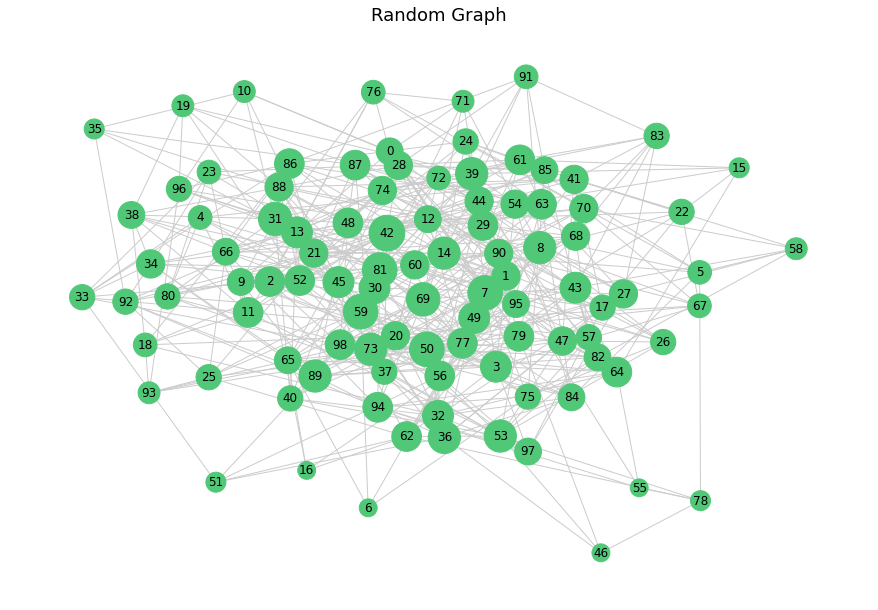

In [907]:
#A hack to tweak the value of p_random_link for networks with a few and with a lot of nodes. 
if n>20:
  p_random_link = .1 - p_random_link/(n*.5)
else:
  p_random_link = p_random_link + .1
G_random = nx.erdos_renyi_graph(n, p_random_link, seed=None, directed=False)
degree_dist = dict(G_random.degree)
plt.figure(figsize=(12, 8))
nx.draw(G_random, edge_color='#CCCCCC', node_size=[v * 80 for v in degree_dist.values()], node_color='#50C878', with_labels = True)
plt.title('Random Graph', size=18)
plt.show()

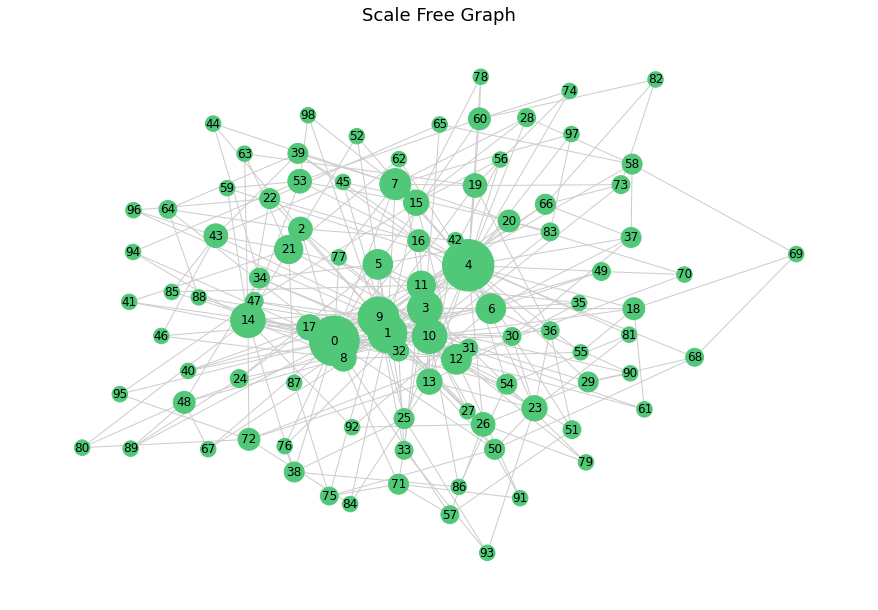

In [908]:
G_scale_free = nx.barabasi_albert_graph(n, 3)
degree_dist = dict(G_scale_free.degree)
plt.figure(figsize=(12, 8))
nx.draw(G_scale_free, edge_color='#CCCCCC', node_size=[v * 80 for v in degree_dist.values()], node_color='#50C878', with_labels = True)
plt.title('Scale Free Graph', size=18)
plt.show()

## **Compare the 6 graphs' properties**

*   diameter
*   average
*   clustering

In [909]:
diameter_star = nx.diameter(G_star)
diameter_path = nx.diameter(G_path)
diameter_small_world = nx.diameter(G_small_world)
diameter_small_world_rewired = nx.diameter(G_small_world_rewired)
if nx.is_connected(G_random):
  diameter_random = nx.diameter(G_random)
else:
  diameter_random = 0  #Graph is disconnected!
diameter_scale_free = nx.diameter(G_scale_free)

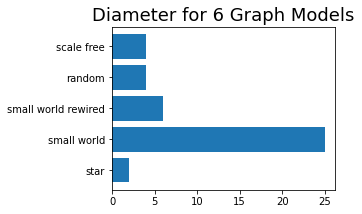

In [910]:
fig = plt.figure(figsize=(4, 3))
plt.title('Diameter for 6 Graph Models', size=18)
graph_models = ["star","small world","small world rewired","random","scale free"]
diameter_values = [diameter_star,diameter_small_world,diameter_small_world_rewired,diameter_random,diameter_scale_free]
plt.barh(graph_models,diameter_values)
plt.show()

In [911]:
avg_path_star = nx.average_shortest_path_length(G_star)
avg_path_path = nx.average_shortest_path_length(G_path)
avg_path_small_world = nx.average_shortest_path_length(G_small_world)
avg_path_small_world_rewired = nx.average_shortest_path_length(G_small_world_rewired)
if nx.is_connected(G_random):
  avg_path_random = nx.average_shortest_path_length(G_random)
else:
  avg_path_random = 0 #Graph is disconnected!
avg_path_scale_free = nx.average_shortest_path_length(G_scale_free)

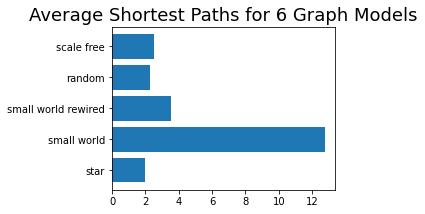

In [912]:
fig = plt.figure(figsize=(4, 3))
plt.title('Average Shortest Paths for 6 Graph Models', size=18)
graph_models = ["star","small world","small world rewired","random","scale free"]
avg_path_values = [avg_path_star,avg_path_small_world,avg_path_small_world_rewired,avg_path_random,avg_path_scale_free]
plt.barh(graph_models,avg_path_values)
plt.show()

In [913]:
clustering_star = nx.average_clustering(G_star)
clustering_path = nx.average_clustering(G_path)
clustering_small_world = nx.average_clustering(G_small_world)
clustering_small_world_rewired = nx.average_clustering(G_small_world_rewired)
clustering_random = nx.average_clustering(G_random)
clustering_scale_free = nx.average_clustering(G_scale_free)

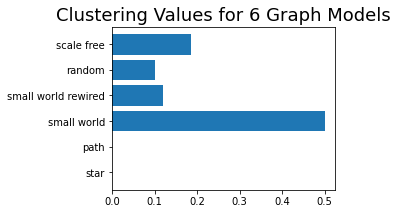

In [914]:
fig = plt.figure(figsize=(4, 3))
plt.title('Clustering Values for 6 Graph Models', size=18)
graph_models = ["star","path","small world","small world rewired","random","scale free"]
clustering_values = [clustering_star,clustering_path,clustering_small_world,clustering_small_world_rewired,clustering_random,clustering_scale_free]
plt.barh(graph_models,clustering_values)
plt.show()

### **Analyze which nodes have the most edges (highest degree)**

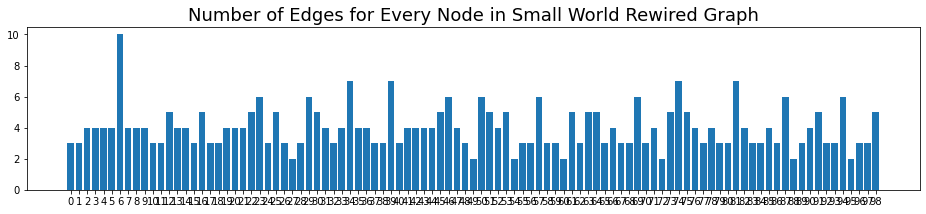

In [915]:
degrees = [val for (node, val) in G_small_world_rewired.degree()]
fig = plt.figure(figsize=(16, 3))
plt.title('Number of Edges for Every Node in Small World Rewired Graph', size=18)
x = list(range(0,n))
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
y = degrees
plt.bar(x,y)
plt.show()

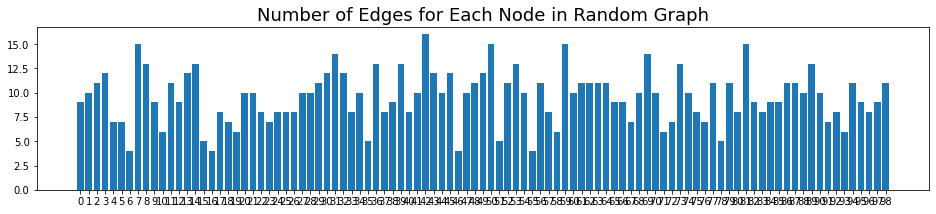

In [916]:
degrees = [val for (node, val) in G_random.degree()]
fig = plt.figure(figsize=(16, 3))
plt.title('Number of Edges for Each Node in Random Graph', size=18)
x = list(range(0,n))
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
y = degrees
plt.bar(x,y)
plt.show()

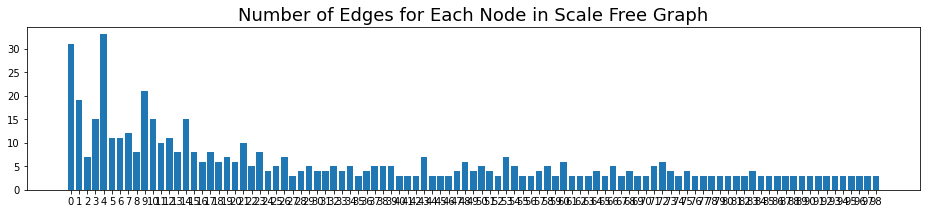

In [917]:
degrees = [val for (node, val) in G_scale_free.degree()]
fig = plt.figure(figsize=(16, 3))
plt.title('Number of Edges for Each Node in Scale Free Graph', size=18)
x = list(range(0,n))
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
y = degrees
plt.bar(x,y)
plt.show()

# **Calculate 3 types of centrality for all the nodes in the Scale Free graph:**
*   Degree centrality
*   Eigenvector centrality
*   Betweenness centrality


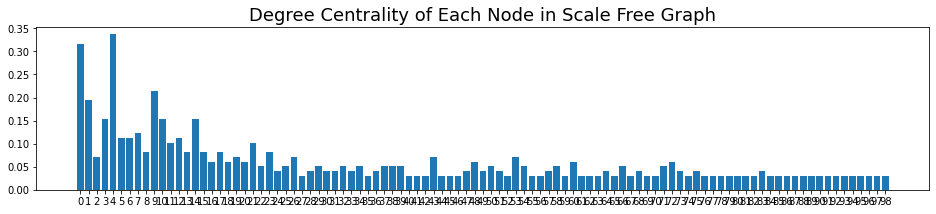

In [918]:
degree_centrality_dict = nx.degree_centrality(G_scale_free)
fig = plt.figure(figsize=(16, 3))
plt.title('Degree Centrality of Each Node in Scale Free Graph', size=18)
plt.bar(range(len(degree_centrality_dict)), list(degree_centrality_dict.values()))
plt.xticks(range(len(degree_centrality_dict)), list(degree_centrality_dict.keys()))
plt.show()

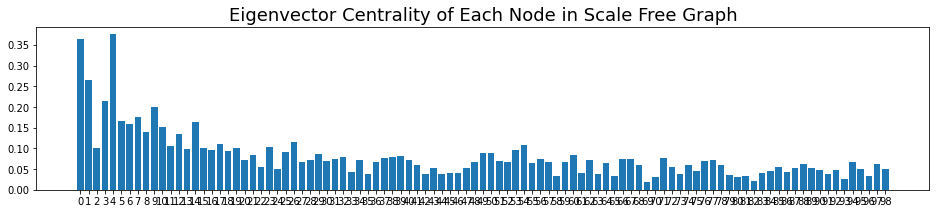

In [919]:
eigenvector_centrality_dict = nx.eigenvector_centrality(G_scale_free)
fig = plt.figure(figsize=(16, 3))
plt.title('Eigenvector Centrality of Each Node in Scale Free Graph', size=18)
plt.bar(range(len(eigenvector_centrality_dict)), list(eigenvector_centrality_dict.values()))
plt.xticks(range(len(eigenvector_centrality_dict)), list(eigenvector_centrality_dict.keys()))
plt.show()

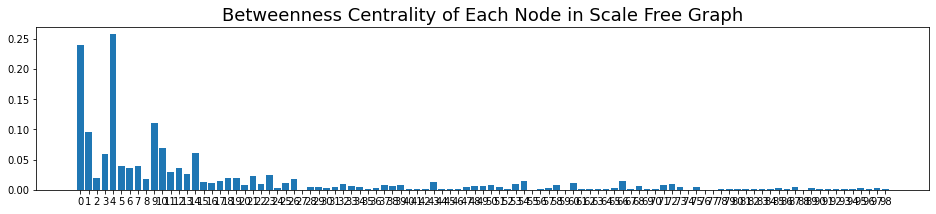

In [920]:
betweenness_centrality_dict = nx.betweenness_centrality(G_scale_free)
fig = plt.figure(figsize=(16, 3))
plt.title('Betweenness Centrality of Each Node in Scale Free Graph', size=18)
plt.bar(range(len(betweenness_centrality_dict)), list(betweenness_centrality_dict.values()))
plt.xticks(range(len(betweenness_centrality_dict)), list(betweenness_centrality_dict.keys()))
plt.show()

## **Export 2 data files**
- edge list (G_scale_free_edgelist.csv)
- nodelist with degrees (nodes_and_degrees.xlsx)

In [921]:
import pandas as pd
import numpy as np

In [922]:
degree_dist = dict(G_scale_free.degree)
df = pd.DataFrame({'nodes': list(degree_dist.keys()),'degree_centrality':list(degree_dist.values())})

In [923]:
df_sorted = df.sort_values('degree_centrality', ascending=False)
#print(df_sorted.to_string(index=False))

In [924]:
df.to_excel('nodes_and_degrees.xlsx', index=0)

In [925]:
nx.write_edgelist(G_scale_free, "G_scale_free_edgelist.csv", delimiter=',', data=False)

## **Simulation the Spread of a Virus**

## How infectious is the virus?
Drag the slider to choose a number between 0.1 - 0.9:

In [926]:
infectiousness = 0.8 #@param {type:"slider", min:0.1, max:0.9, step:0.1}

## How quickly do people recover from the virus?
Drag the slider to choose a number between 0.3 - 0.9 (slowly to quickly):

In [927]:
recovery_speed = 0.7 #@param {type:"slider", min:0.3, max:0.9, step:0.1}

In [928]:
alpha = infectiousness
mu = recovery_speed

In [929]:
def init_conditions():
  #Set all nodes to be in state 0 susceptible
  state = 0
  nx.set_node_attributes(G_scale_free, state, "state")
  #Set node(s) to be in state 1 infectious
  G_scale_free.nodes[5]['state'] = 1 #


In [930]:
def get_infected_nodes():
    infected_nodes = [x for x,y in G_scale_free.nodes(data=True) if y['state']==1]
    return infected_nodes
def get_recovered_nodes():
    recovered_nodes = [x for x,y in G_scale_free.nodes(data=True) if y['state']==2]
    return recovered_nodes
def get_susceptible_nodes():
    susceptible_nodes = [x for x,y in G_scale_free.nodes(data=True) if y['state']==0]
    return susceptible_nodes

In [931]:
def draw_network_graph(time):
  color_state_map = {2: '#788787', 0: '#50C878', 1: '#FF4D4D'}
  plt.figure(figsize=(12, 5))
  nx.draw(G_scale_free, edge_color='#CCCCCC', node_size=[v * 80 for v in degree_dist.values()], node_color=[color_state_map[node[1]['state']] for node in G_scale_free.nodes(data=True)], with_labels = True)
  plt.title('Scale Free Graph Node Health Status at Time = ' +str(time), size=18)
  plt.show()

In [932]:

def spread_virus():
    infected_nodes_list = get_infected_nodes()
    t = 0
    infected_num_list = []
    recovered_num_list = []
    susceptible_num_list = []
    while(len(infected_nodes_list)>0):
        t=t+1
        infected_nodes_list = get_infected_nodes()
        num_infected = len(infected_nodes_list)
        recovered_nodes_list = get_recovered_nodes()
        num_recovered = len(recovered_nodes_list)
        susceptible_nodes_list = get_susceptible_nodes()
        num_susceptible = len(susceptible_nodes_list)        
        infected_num_list.append(num_infected)
        recovered_num_list.append(num_recovered)
        susceptible_num_list.append(num_susceptible)
        for i in infected_nodes_list:
            neibs = list(G_scale_free.neighbors(i))
            #print("node: "+str(i))
            for j in neibs:
                #print(j)
                if (G_scale_free.nodes[j]['state']==0):
                    #print(j)
                    if (np.random.random() <= alpha):
                        #print("neib: "+str(j))
                        G_scale_free.nodes[j]['state']=1
                        #print("state: "+ str(G_scale_free.nodes[j]['state']))
            if (np.random.random() <= mu):
                G_scale_free.nodes[i]['state']=2
        infected_nodes_list = get_infected_nodes()
        draw_network_graph(t)
        df_attrib.append(pd.DataFrame.from_dict(dict(G_scale_free.nodes(data=True)), orient='index'))
        #print(infected_nodes_list)
    infected_nodes_list = get_infected_nodes()
    num_infected = len(infected_nodes_list)
    recovered_nodes_list = get_recovered_nodes()
    num_recovered = len(recovered_nodes_list)
    susceptible_nodes_list = get_susceptible_nodes()
    num_susceptible = len(susceptible_nodes_list)        
    infected_num_list.append(num_infected)
    recovered_num_list.append(num_recovered)
    susceptible_num_list.append(num_susceptible)
    return t, infected_num_list, recovered_num_list, susceptible_num_list

In [933]:
def print_stats():
    r0 = round(((alpha*avg_deg)/mu), 2)
    print("R0: ", r0)
    print("Peak cases: ", max(epi_curve_data))
    print("Peak time period: ", epi_curve_data.index(max(epi_curve_data)))
    print("Total time periods: ", num_periods)        
    print("# of susceptible never infected: ", len(get_susceptible_nodes()))

In [934]:
def generate_epidemic_graph():
  fig = plt.figure(figsize=(15, 6))
  ax = plt.axes()
  plt.xlabel('xlabel', fontsize=16)
  plt.ylabel('ylabel', fontsize=16)
  #ax.set_yscale('log')
  plt.stackplot(x,epi_curve_data, sup_curve_data, rec_curve_data, labels=['Infectious','Suspectible','Recovered'], colors=['#FF4D4D','#50C878','#788787'])
  ax.set(xlabel='Time', ylabel='Number of People')
  fig.suptitle('Epidemic Curve: infectiousness = '+str(infectiousness) + ' recovery speed = '+str(recovery_speed), fontsize=20)
  plt.legend()

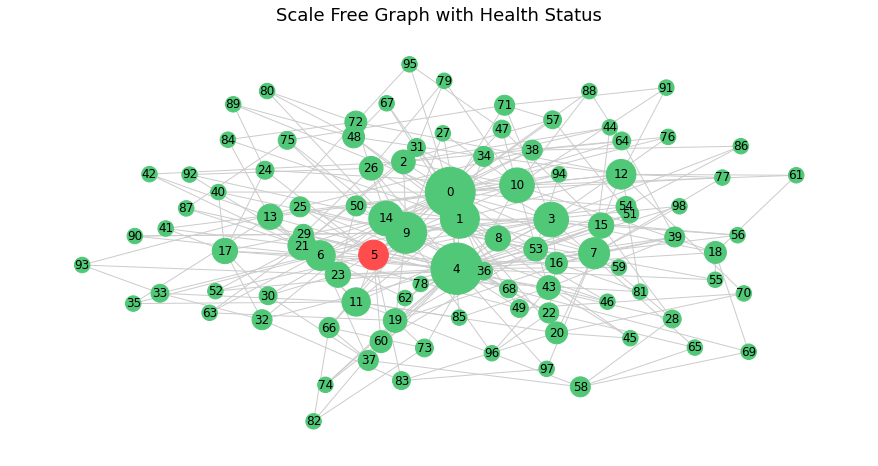

In [935]:
init_conditions()
df_attrib= [] #list of panda dataframes to store health states in each time period
color_state_map = {2: '#788787', 0: '#50C878', 1: '#FF4D4D'}
plt.figure(figsize=(12, 6))
nx.draw(G_scale_free, edge_color='#CCCCCC', node_size=[v * 80 for v in degree_dist.values()], node_color=[color_state_map[node[1]['state']] for node in G_scale_free.nodes(data=True)], with_labels = True)
plt.title('Scale Free Graph with Health Status', size=18)
plt.show()

#Run the simulation:#

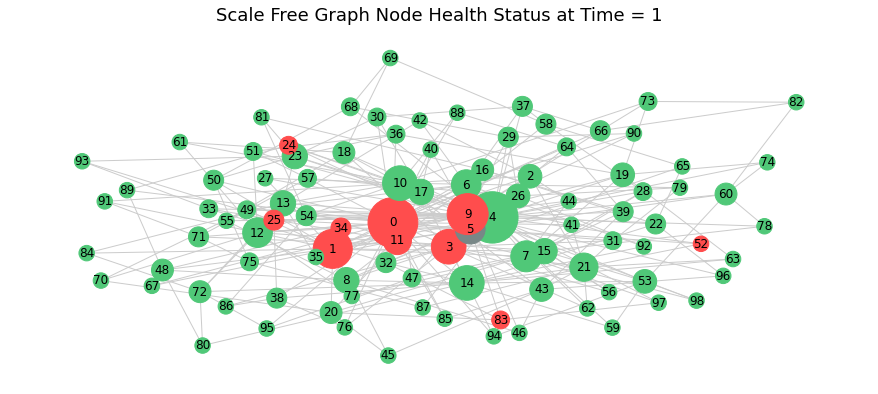

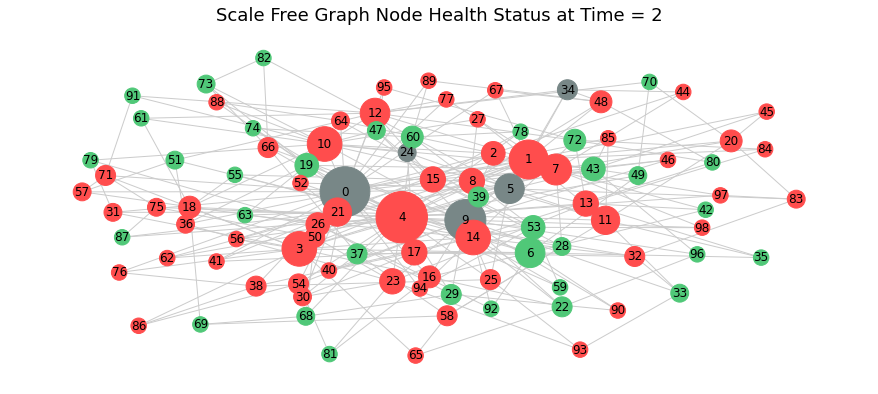

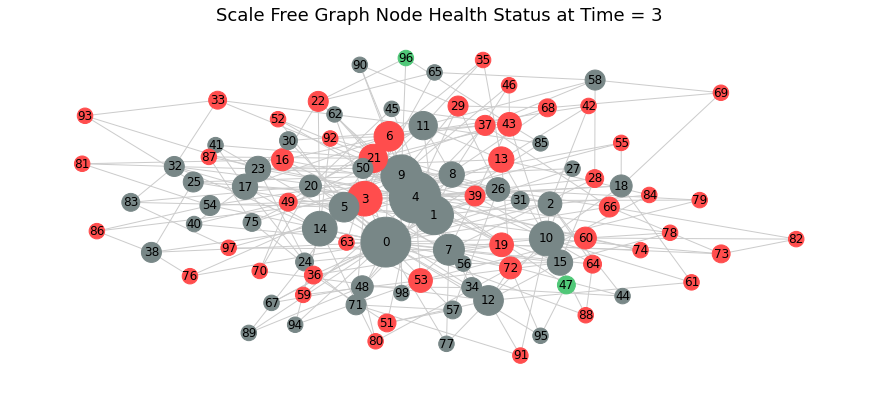

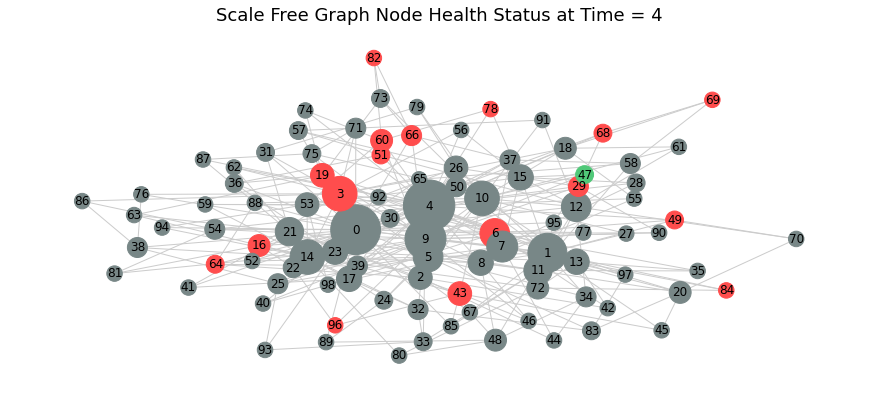

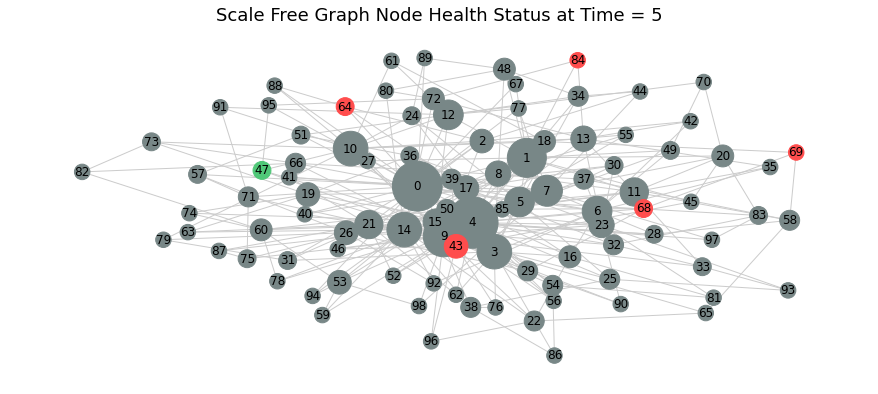

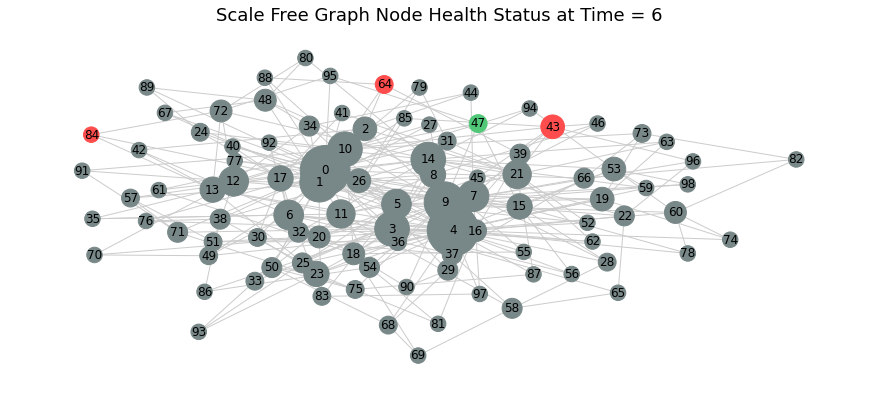

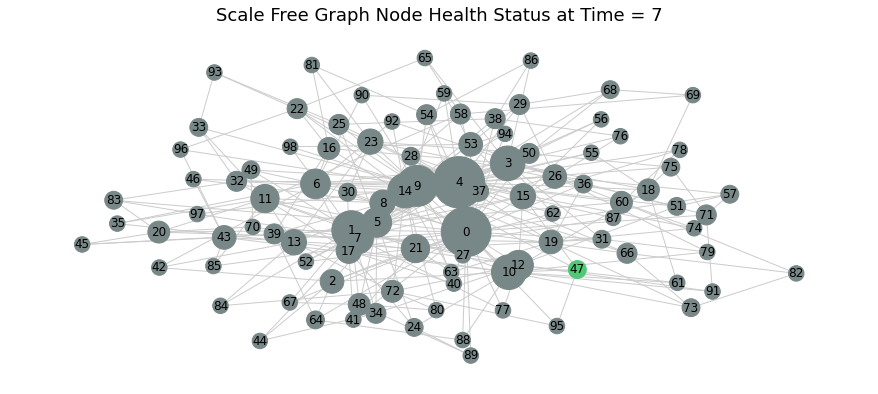

In [936]:
num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()

In [937]:
degrees = [val for (node, val) in G_scale_free.degree()]
avg_deg = G_scale_free.number_of_edges()/n
print_stats()

R0:  3.32
Peak cases:  59
Peak time period:  2
Total time periods:  7
# of susceptible never infected:  1


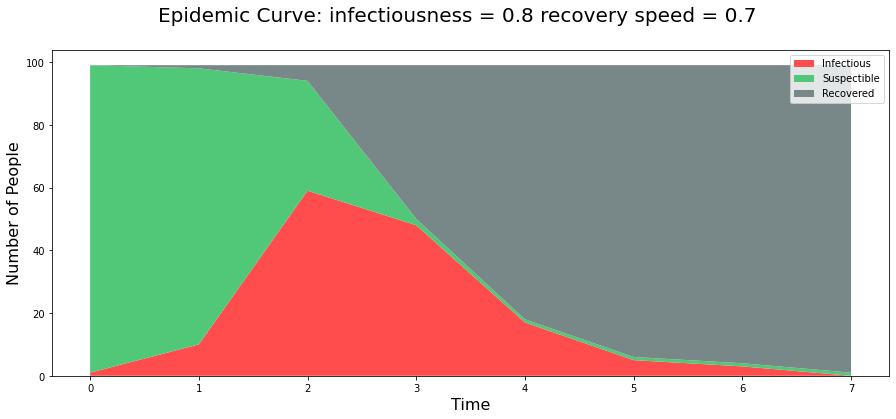

In [938]:
x = list(range(0, len(epi_curve_data)))
generate_epidemic_graph()

#### Save the node and their health states for every time period T into a separate file

In [939]:
for x in range(0,len(df_attrib)):
  df_attrib[x].to_excel('nodes_and_health_status_t' +str(x+1) + '.xlsx')

# **End of tutorial**